In [5]:
import cvxpy as cvx
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import scipy.ndimage as spimg

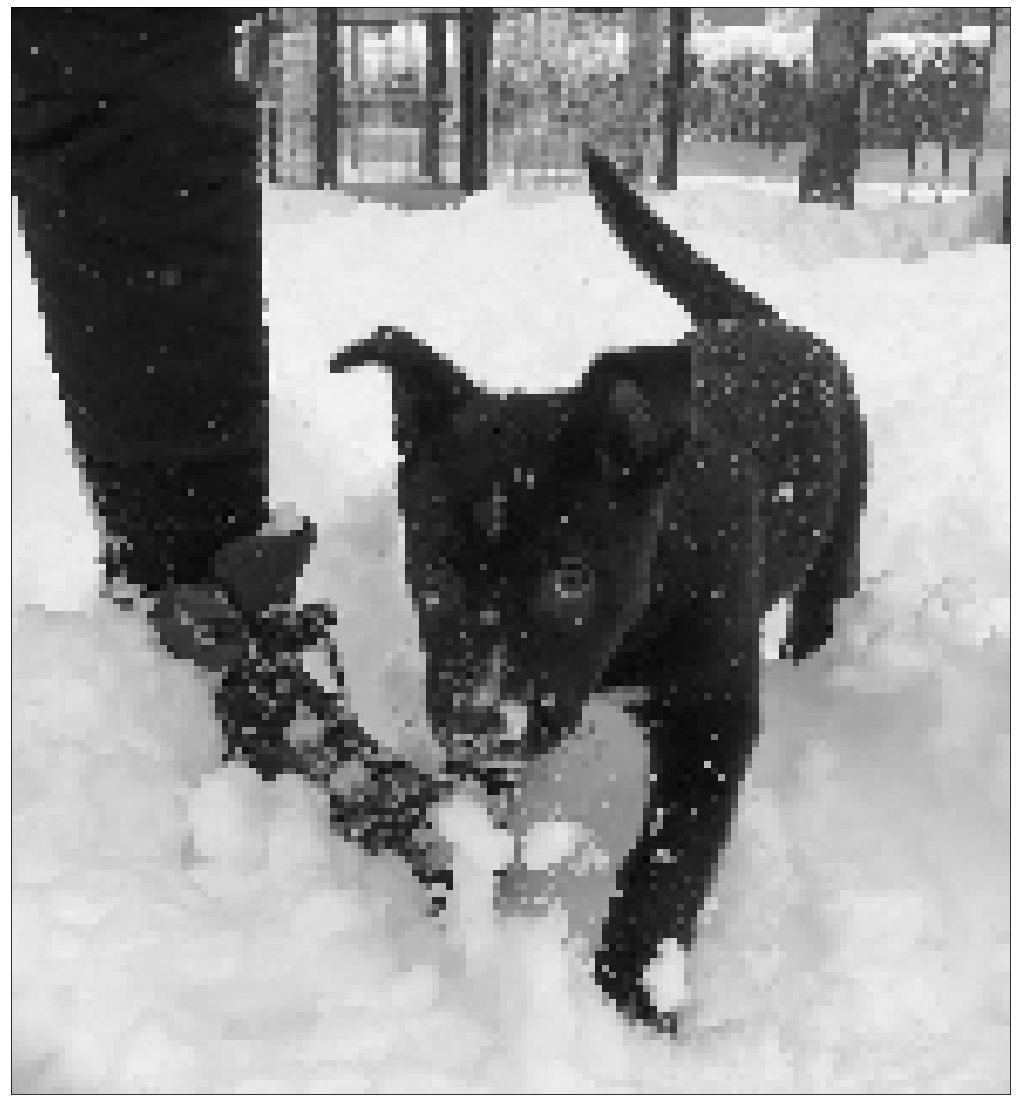

<Figure size 1440x1440 with 0 Axes>

In [23]:
### Construct an ndarray of all traces.
data = mpimg.imread(os.path.join('C:\\Users\\SE79065\\Documents\\CompressiveSensing\\images\\LOLA.jpg'))
data = np.mean(data,-1)
data_z = spimg.zoom(data, 0.1)
ny,nx = data_z.shape

plt.imshow(data_z,cmap = 'gray',vmin=0,vmax=255)
plt.xticks([])
plt.yticks([])
fig = plt.figure(figsize=(20,20))
plt.show()

# extract small sample of signal
k = round(nx * 0.5) # 50% sample
ri = np.random.choice(nx, k, replace=False)# random sample of indices
b = data_z[:,ri]
b = b.flat
b = np.expand_dims(b, axis=1)

In [24]:
# create Theta using kron (memory errors for large ny*nx)
A = np.kron(
    np.fft.ifft(np.identity(nx), norm='ortho', axis=0),
    np.fft.ifft(np.identity(ny), norm='ortho', axis=0)
    )
A = A[ri,:] 
np.shape(A)

MemoryError: Unable to allocate 8.24 GiB for an array with shape (21609, 25600) and data type complex128

In [ ]:
# do L1 optimization
vx = cvx.Variable(nx * ny)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == b]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)
Xat2 = np.array(vx.value).squeeze()
# reconstruct signal
Xat = Xat2.reshape(nx, ny).T # stack columns
Xa = np.fft.ifft2(Xat)

# confirm solution
if not np.allclose(X.T.flat[ri], Xa.T.flat[ri]):
    print('Warning: values at sample indices don\'t match original.')

# create images of mask (for visualization)
mask = np.zeros(data.shape)
mask.T.flat[ri] = 255
Xm = 255 * np.ones(data.shape)
Xm.T.flat[ri] = X.T.flat[ri]